# Week 3
## Data retrieval, preprocessing, and normalization for ML


## Basic Outline
  
* Where do data come from? Data retreival.
* Ideal datasets and data types
* Common wrangling needs and implementations

## Where did you get your data?



* Generated in-house (stored as CSVs, TSVs, SQL, proprietary, etc)

* Collaborators

* Public sources

## Scripting data retrieval improves reproducibility

In [13]:
# you may need to:
# !pip install requests

In [14]:
# Downloading a data file from a remote repository
import urllib

URL = "https://dcc.icgc.org/api/v1/download?fn=/release_18/Projects/BRCA-US/protein_expression.BRCA-US.tsv.gz"
FILENAME = "brca_protein_expression.tsv.gz"

urllib.request.urlretrieve(URL, FILENAME)

('brca_protein_expression.tsv.gz', <http.client.HTTPMessage at 0x7f7f64bd4358>)

* Scraping tools such as Mechanize and BeautifulSoup allow extraction of data from websites


In [21]:
import requests
# Retrieving data from a remote web service in JSON format that gets converted to a python structure:
def get_genome_sequence_ensembl(chromosome, start, end):
    """ API described here http://rest.ensembl.org/documentation/info/sequence_region"""
    url = 'https://rest.ensembl.org/sequence/region/human/{0}:{1}..{2}:1?content-type=application/json'.format(
        chromosome, start, end)
    r = requests.get(url, headers={"Content-Type": "application/json"}, timeout=10.000)
    if r.ok:
        return r.json()['seq']
print(get_genome_sequence_ensembl(7, 200000,200100))

TTCTTGACACTGATTGATCTGCCAAAAGGGGAAGAATGAGTCCAGCTAGAATCCAGGACTAACCAGCGGGTGAGCTTCAAGGAACAAAGGGCTTCCGCTGG



## Pandas covers most of the data retrieval needs

In [22]:
import pandas as pd

# Let's read with pandas
# Note that we do not even need to unzip the file before opening!
brca_data = pd.read_csv(FILENAME, sep="\t")
brca_data.head(1)

,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,antibody_id,gene_name,gene_stable_id,gene_build_version,normalized_expression_level,verification_status,verification_platform,platform,experimental_protocol,raw_data_repository,raw_data_accession
0,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,PAI-1,SERPINE1,NaN,NaN,1.769954,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20


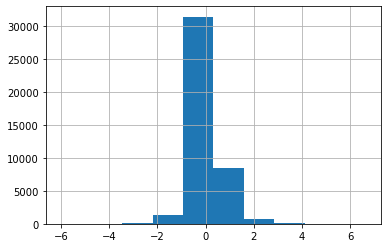

In [23]:
import matplotlib.pyplot as plt 

%matplotlib inline 

brca_data['normalized_expression_level'].hist()

## Pandas can even retrieve from an SQL database directly

In [24]:
# you may need to 
# !pip install sqlalchemy
# !pip install pymysql

In [25]:
import sqlalchemy as sa
# Connect to UCSC genomic database
engine = sa.create_engine('mysql+pymysql://genome@genome-mysql.cse.ucsc.edu/hg38', poolclass=sa.pool.NullPool)
# select 3 SNPs from Chromosome Y
pd.read_sql("SELECT * FROM snp147Common WHERE chrom='chrY' LIMIT 3", engine)

ModuleNotFoundError: No module named 'pymysql'


## Pandas dataframes

* Dataframes are convenient containers for mixed data types

* Pandas is *incredibly useful* for data wrangling

* sklearn is happy to accept Pandas dataframes as input

* Pandas is built for exploratory analysis, visualization and stat tests / ML 

In [26]:
%matplotlib inline 

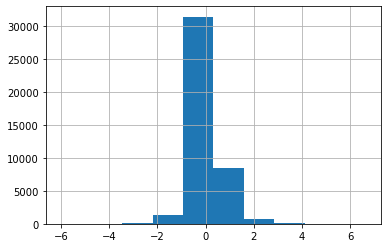

In [27]:
import matplotlib.pyplot as plt 
%matplotlib inline 

brca_data['normalized_expression_level'].hist(); #semicolon at the end hides useless info 

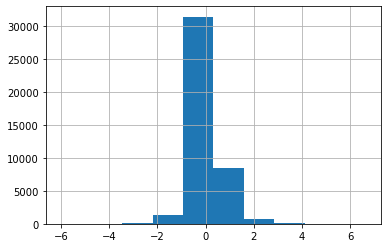

In [28]:
brca_data.normalized_expression_level.hist() #with the semi-olon it does not reference the location in the memory like below 

<matplotlib.axes._subplots.AxesSubplot at 0x118e28278.

In [29]:
brca_data.head()

,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,antibody_id,gene_name,gene_stable_id,gene_build_version,normalized_expression_level,verification_status,verification_platform,platform,experimental_protocol,raw_data_repository,raw_data_accession
0,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,PAI-1,SERPINE1,NaN,NaN,1.769954,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
1,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ARID1A,ARID1A,NaN,NaN,0.619539,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
2,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,mTOR_pS2448,FRAP1,NaN,NaN,-0.538637,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
3,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ASNS,ASNS,NaN,NaN,1.156044,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
4,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,EGFR,EGFR,NaN,NaN,0.120138,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20


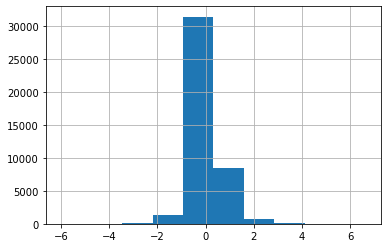

In [30]:
# Plotting boilerplate
import matplotlib.pyplot as plt
%matplotlib inline

brca_data['normalized_expression_level'].hist()

## Pre-processing a dataset: when are ready for ML?

* Ideally, data are organized as a table: examples-vs-features

* Data from multiple sources are combined

* Missing data are handled

* Features have been combined and manipulated as needed

* Any data that need to be normalized have been normalized

* Data are of the correct type (e.g. categorical vs continuous, boolean vs int)

## Let's have a look at Boston housing prices

In [31]:
boston = pd.read_csv("boston_data.csv")
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice
0,1,65.0,Y,856,Normal,208500
1,2,80.0,Y,1262,Normal,181500
2,3,68.0,Y,920,Normal,223500
3,4,60.0,Y,961,Abnorml,140000
4,5,84.0,Y,1145,Normal,250000


## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* Data from multiple sources are combined
* Missing data are handled
* Features have been combined and manipulated as needed
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

## Combining data from multiple sources

In [32]:
boston_second_floor = pd.read_csv("boston_second_floor.csv", sep=",")
boston_second_floor.head()
#boston.head()

,Id,2ndFlrSF
0,2,0
1,1,854
2,3,866
3,4,756
4,5,1053


## Combining data from multiple sources

In [33]:
boston_second_floor.head(1) #merges them on the id catagory of their id 

,Id,2ndFlrSF
0,2,0


In [38]:
# Let's combine boston and boston second floor
boston = pd.merge(boston, boston_second_floor, on="Id")
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF_x,2ndFlrSF_y
0,1,65.0,Y,856,Normal,208500,854,854
1,2,80.0,Y,1262,Normal,181500,0,0
2,3,68.0,Y,920,Normal,223500,866,866
3,4,60.0,Y,961,Abnorml,140000,756,756
4,5,84.0,Y,1145,Normal,250000,1053,1053


In [39]:
# Let's add some additional data
boston3 = pd.read_csv("boston_additional.csv", sep=",")
boston3.head()

,Id,CentralAir,1stFlrSF,SaleCondition,SalePrice,LotFrontage
0,44,Y,938,Normal,130250,NaN
1,45,Y,1150,Normal,141000,70.0
2,46,Y,1752,Normal,319900,61.0


In [40]:
boston_second_floor.head(1)

,Id,2ndFlrSF
0,2,0


## Thus far

In [41]:
boston.tail(10)
boston.shape
#boston.tail()

(43, 8)

## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* Missing data are handled
* Features have been combined and manipulated as needed
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

## Missing data
There are a number of ways to handle missing data:

* Drop all records with a value missing (simplest, but can lead to bias)
* Substitute all missing values with an approximated value (usually depends on data and algorithm)
* Add additional feature indicating when a value is missing

## Missing data

In [42]:
# Drop all records with missing data
#boston.isnull().tail()
# boston.isnull().sum()
# boston.isnull().sum().sum()
#boston.tail()
#boston.dropna().tail()
boston.dropna().isna().sum() #is na is the preferance
#sums up the isna  
#is na gives daatframe of t/f 
#running sum sums up the booleans within the column

Id               0
LotFrontage      0
CentralAir       0
1stFlrSF         0
SaleCondition    0
SalePrice        0
2ndFlrSF_x       0
2ndFlrSF_y       0
dtype: int64

In [43]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 8 columns):
Id               43 non-null int64
LotFrontage      36 non-null float64
CentralAir       43 non-null object
1stFlrSF         43 non-null int64
SaleCondition    43 non-null object
SalePrice        43 non-null int64
2ndFlrSF_x       43 non-null int64
2ndFlrSF_y       43 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 3.0+ KB


In [47]:
boston.fillna(0) #fills in all missing values with whagt you provide 

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF_x,2ndFlrSF_y
0,1,65.0,Y,856,Normal,208500,854,854
1,2,80.0,Y,1262,Normal,181500,0,0
2,3,68.0,Y,920,Normal,223500,866,866
3,4,60.0,Y,961,Abnorml,140000,756,756
4,5,84.0,Y,1145,Normal,250000,1053,1053
5,6,85.0,Y,796,Normal,143000,566,566
6,7,75.0,Y,1694,Normal,307000,0,0
7,8,0.0,Y,1107,Normal,200000,983,983
8,9,51.0,Y,1022,Abnorml,129900,752,752
9,10,50.0,Y,1077,Normal,118000,0,0


In [48]:
# Substitute missing values
# boston.fillna("Value!").tail()
boston.fillna({"2ndFlrSF": "Value1!", "LotFrontage": "Value2!"}).tail()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF_x,2ndFlrSF_y
38,39,68,Y,1057,Abnorml,109000,0,0
39,40,65,N,1152,AdjLand,82000,0,0
40,41,84,Y,1324,Abnorml,160000,0,0
41,42,115,Y,1328,Normal,170000,0,0
42,43,Value2!,Y,884,Normal,144000,0,0


In [49]:
# Substitute missing values with mean
print(boston.mean())
#boston.fillna(boston.mean()).tail()
#boston.fillna(boston.median()).tail()

Id                 22.000000
LotFrontage        74.055556
1stFlrSF         1173.860465
SalePrice      178170.930233
2ndFlrSF_x        236.697674
2ndFlrSF_y        236.697674
dtype: float64


In [ ]:
# Add column indicating missing values
# boston["2ndFlrSF"].isnull()
#boston["missing_second_floor"] = boston["2ndFlrSF"].isnull()
# boston.tail()
# boston = boston.fillna(boston.mean())
# boston.tail()

In [20]:
boston.LotFrontage.hist()

NameError: name 'boston' is not defined

In [ ]:
boston.LotFrontage.fillna(boston.LotFrontage.mean()).hist()

In [ ]:
# You may need to upgrade Scikit-learn (and restart Jupyter kernel afterwards) to use Imputer
# !pip install scikit-learn --upgrade

In [ ]:
# Imputation is a general technique for "guessing" appropriate missing values
# It could be implemented as a complex ML regression algorithm or a simple 'take an average' strategy.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit_transform(boston[["LotFrontage"]])

mice imputation 
1. drop na- 


2. fill na 

In [ ]:
boston.dropna(axis=1).LotFrontage.hist()
# 0 drops -rows
# 1 drops -columns

In [ ]:
boston.loc[boston.LotFrontage.isna()] #we want to predict lot frontage from th3se rows 

In [ ]:
boston.loc[~boston.LotFrontage.isna()] #the opposite of these rows 

In [50]:
from pandas.plotting import scatter_matrix

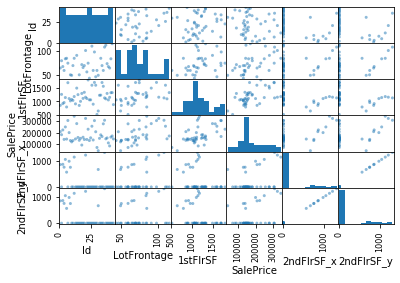

In [51]:
scatter_matrix(boston); #might find a pattern here 
#median or mean impuation makes the most sense 

In [52]:
import matplotlib.pyplot as plt 
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [53]:
#to make this look nicer 

import seaborn as sns 

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
sns.pairplot(boston)

In [ ]:
#for catagorical variables 

sns.pairplot(boston, hue="CentralAir"); #binary, here this provids labeling 

In [ ]:
boston.CentralAir.value_counts()

In [ ]:
sns.pairplot(boston, hue="CentralAir")  #need a catgorical variable 

In [ ]:
boston.LotFrontage.mode() #for catagorical

In [ ]:
boston.corr()

In [ ]:
boston.CentralAir.map({"Y":1, "N":0})

In [54]:
boston['CentralAir']= boston.CentralAir.map({"Y":1, "N":0})

In [55]:
boston.CentralAir.unique()

array([1, 0])

In [56]:
boston.dtypes

Id                 int64
LotFrontage      float64
CentralAir         int64
1stFlrSF           int64
SaleCondition     object
SalePrice          int64
2ndFlrSF_x         int64
2ndFlrSF_y         int64
dtype: object

In [57]:
#add column indicating the missing vlues
boston["2ndfloorSfz"].isnull()
#boston.tail()
boston=boston.fillna(boston.mean())
#boston.tail()

KeyError: '2ndfloorSfz'

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(boston[["LotFrontage"]])

gives us back an array 
pyski learn pandas always dataframes, numpy all frames 

we pass to this fit learn of impute 

most frequent 

In [ ]:
boston.LotFrontage.mode()
#returns the most freq


In [58]:
boston.dtypes #shows us what comprides the data 

Id                 int64
LotFrontage      float64
CentralAir         int64
1stFlrSF           int64
SaleCondition     object
SalePrice          int64
2ndFlrSF_x         int64
2ndFlrSF_y         int64
dtype: object

In [ ]:
boston.CentralAir.head()

In [ ]:
boston.SaleCondtion.unique()

##Dummy variables 

In [ ]:
pd.get_dummies(boston,columns=["SalesCondition"], drop_first="True")#we don't need the 1st column to be unique 
#splits the column into binary patterns 
#if gouing to have something with 2 levels need dummy variable and make this binary 



In [ ]:
boston.CentralAir.map({})

In [ ]:
boston.CentralAir.unique()

## How to decide how to treat missing data?
* Very data-dependent!
* Decisions need to be justified and documented
* Implement missing data preprocessing in a reproducible way (python script)
* Don't create data from nothing
* Iris example

## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* Features have been combined and manipulated as needed
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

In [ ]:
# boston.head()
boston["total_sf"] = boston["1stFlrSF"] + boston["2ndFlrSF"]
boston.head()

In [ ]:
boston.head()
boston = boston.replace({"Abnorml": "abnormal", "Normal": "normal"})
boston.head()

In [ ]:
#in the end we really want adataframe where all the datatypes ae numeric 

boston.dtypes 

In [ ]:
boston.select_dtypes(include='number') #selects all of the numbers
#if we did this on the original data we would not have models forcentralair and we would not have sales 
#this has now been established as usbale datatypes from the scikitlearnb data 

## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* ~~Features have been combined and manipulated as needed~~
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

In [ ]:
boston.Salecondition.head() 

## Normalization
* What is it?
* Why do it? (data sources, feature distributions)
* Types?

scikit learn 
2 sci kit learn  objects 

# sci-kit learn objet types
1. estimators
- classifiers 
- regressors 
2. transformers 

### Normalization

Many machine learning algorithms expect features to have similar distributions and scales.

A classic example is gradient descent, if features are on different scales some weights will update faster than others because the feature values scale the weight updates.

There are two common approaches to normalization:

* Z-score standardization
* Min-max scaling

#### Z-score standardization

Z-score standardization rescales values so that they have a mean of zero and a standard deviation of 1. Specifically we perform the following transformation:

$$z = \frac{x - \mu}{\sigma}$$

#### Min-max scaling

An alternative is min-max scaling that transforms data into the range of 0 to 1. Specifically:

$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

Min-max scaling is less commonly used but can be useful for image data and in some neural networks.

z score std deviations mean that the data will have a mean of zero and score of one 

min-max- takes values and subtracts the min in that column and div by diff btwn the max in bounds 
less common then other normalizations 



In [59]:
# a = (boston['1stFlrSF'] - boston['1stFlrSF'].mean()) / boston['1stFlrSF'].std()
# boston['1stFlrSF'].hist()
# boston.head()
## boston.total_sf.hist()
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler

scaler = StandardScaler()
print(scaler.fit_transform(boston[['1stFlrSF']]))
#scaled_size = pd.Series(scale(boston.total_sf))
#scaled_size.hist()
#scaled_size.mean()
#scaled_size.std(ddof=0)
#boston["normalized_total_sf"] = scaled_size

[[-1.11717197]
 [ 0.30978064]
 [-0.89223363]
 [-0.7481325 ]
 [-0.10143477]
 [-1.32805167]
 [ 1.82811445]
 [-0.23499191]
 [-0.53373814]
 [-0.34043176]
 [-0.47047424]
 [ 0.02860771]
 [-0.92035092]
 [ 1.12518213]
 [ 0.27814868]
 [-1.12420129]
 [-0.59700205]
 [ 0.42927913]
 [-0.21038928]
 [ 0.58040958]
 [-0.05574417]
 [-0.23147725]
 [ 2.18309527]
 [-0.400181  ]
 [-0.400181  ]
 [ 1.49773626]
 [-0.96252686]
 [ 1.86326106]
 [ 1.49773626]
 [-2.29809827]
 [-1.84470692]
 [ 0.19028214]
 [ 0.21137011]
 [ 1.84920242]
 [ 1.36066446]
 [-0.14712537]
 [-0.27013853]
 [ 0.43279379]
 [-0.41072499]
 [-0.07683214]
 [ 0.52768966]
 [ 0.5417483 ]
 [-1.01876145]]


In [ ]:
scaler.transform() #transforms the data
scaler.fit() #train the transformed data to work on future data
scaler.fit_transform() #does both of the above steps 

In [69]:
print(scaler.fit_transform(boston[['1stFlrSF']]))

[[-1.11717197]
 [ 0.30978064]
 [-0.89223363]
 [-0.7481325 ]
 [-0.10143477]
 [-1.32805167]
 [ 1.82811445]
 [-0.23499191]
 [-0.53373814]
 [-0.34043176]
 [-0.47047424]
 [ 0.02860771]
 [-0.92035092]
 [ 1.12518213]
 [ 0.27814868]
 [-1.12420129]
 [-0.59700205]
 [ 0.42927913]
 [-0.21038928]
 [ 0.58040958]
 [-0.05574417]
 [-0.23147725]
 [ 2.18309527]
 [-0.400181  ]
 [-0.400181  ]
 [ 1.49773626]
 [-0.96252686]
 [ 1.86326106]
 [ 1.49773626]
 [-2.29809827]
 [-1.84470692]
 [ 0.19028214]
 [ 0.21137011]
 [ 1.84920242]
 [ 1.36066446]
 [-0.14712537]
 [-0.27013853]
 [ 0.43279379]
 [-0.41072499]
 [-0.07683214]
 [ 0.52768966]
 [ 0.5417483 ]
 [-1.01876145]]


In [70]:
print(scaler.fit_transform(boston[['1stFlrSF']])) #retruns array 
scaled_size = pd.Series(scale(boston.total_sf))

[[-1.11717197]
 [ 0.30978064]
 [-0.89223363]
 [-0.7481325 ]
 [-0.10143477]
 [-1.32805167]
 [ 1.82811445]
 [-0.23499191]
 [-0.53373814]
 [-0.34043176]
 [-0.47047424]
 [ 0.02860771]
 [-0.92035092]
 [ 1.12518213]
 [ 0.27814868]
 [-1.12420129]
 [-0.59700205]
 [ 0.42927913]
 [-0.21038928]
 [ 0.58040958]
 [-0.05574417]
 [-0.23147725]
 [ 2.18309527]
 [-0.400181  ]
 [-0.400181  ]
 [ 1.49773626]
 [-0.96252686]
 [ 1.86326106]
 [ 1.49773626]
 [-2.29809827]
 [-1.84470692]
 [ 0.19028214]
 [ 0.21137011]
 [ 1.84920242]
 [ 1.36066446]
 [-0.14712537]
 [-0.27013853]
 [ 0.43279379]
 [-0.41072499]
 [-0.07683214]
 [ 0.52768966]
 [ 0.5417483 ]
 [-1.01876145]]


AttributeError: 'DataFrame' object has no attribute 'total_sf'

In [67]:
boston["normalized_total_sf"]= scaled_size

NameError: name 'scaled_size' is not defined

In [ ]:
print(scaler.fit_transformn(boston[['1stFlrSF']]))

In [66]:
scaled_size.hist() #normalized dta from the transform function 

NameError: name 'scaled_size' is not defined

In [ ]:
import numpy as np
np.isclose(scaler.fit_transform(boston[['1stFlrSF']]).sum(), 0) #tells us how closeit is to 0  
#you can interchange sum with mean(), median() or std()

In [ ]:
scaler.fit_transform(boston[['1stFlrSF']]).sum()

In [33]:
scaler = MinMaxScaler()
print(scaler.fit_transform(boston[['1stFlrSF']]))

[[0.26352941]
 [0.58196078]
 [0.31372549]
 [0.34588235]
 [0.49019608]
 [0.21647059]
 [0.92078431]
 [0.46039216]
 [0.39372549]
 [0.43686275]
 [0.40784314]
 [0.51921569]
 [0.30745098]
 [0.76392157]
 [0.57490196]
 [0.26196078]
 [0.37960784]
 [0.60862745]
 [0.46588235]
 [0.64235294]
 [0.50039216]
 [0.46117647]
 [1.        ]
 [0.42352941]
 [0.42352941]
 [0.84705882]
 [0.29803922]
 [0.92862745]
 [0.84705882]
 [0.        ]
 [0.10117647]
 [0.55529412]
 [0.56      ]
 [0.9254902 ]
 [0.81647059]
 [0.48      ]
 [0.45254902]
 [0.60941176]
 [0.42117647]
 [0.49568627]
 [0.63058824]
 [0.63372549]
 [0.2854902 ]]


/Users/agoncear/anaconda/envs/jupyter/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [ ]:
boston["normalized_total_sf"] = scaled_size

from sklearn.preprocessing import OneHptEncoder 

OneHotEncoder.

## Other preprocessing / normalization techniques and thoughts
* http://scikit-learn.org/stable/modules/preprocessing.html
* http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html

## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* ~~Features have been combined and manipulated as needed~~
* ~~Any data that need to be normalized have been normalized~~
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

In [72]:
boston["CentralAir"] == "1"

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
Name: CentralAir, dtype: bool

In [71]:
#boston.head()
import numpy as np

# boston["1stFlrSF"].mean(skipna=False)
boston["CentralAir_bool"] = boston["CentralAir"] == "1"
# boston.head()
# boston["SaleCondition"].dtype
#boston["SaleCondition"].head()
boston["SaleCondition"].astype("category").dtype
#boston["SaleCondition"] = boston["SaleCondition"].astype("category")
#boston["SaleCondition"].dtype

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


CategoricalDtype(categories=['Abnorml', 'AdjLand', 'Normal', 'Partial'], ordered=False)

In [ ]:
pd.get_dummies ~ OneHotEncoder #these are the same thing 

In [35]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

lb = LabelBinarizer() #LEARN HOW TO BINARIZE AND TRANSFORM 
lb.fit_transform(['yes', 'yes', 'no', 'no'])          

array([[1],
       [1],
       [0],
       [0]])

In [36]:
lb.fit_transform(['yes', 'yes', 'no', 'no', 'maybe'])

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [37]:
ohe = OneHotEncoder()
sparse_matrix = ohe.fit_transform(boston[['SaleCondition', 'CentralAir_bool']])
sparse_matrix.todense() #capturing both of these into 6 columns 
#turning into binary code of 6 colums 


matrix([[0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 0., 1.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0

6 columns bc we have 2 layers in central air along with  and we have 4 layers within sale condition 

### Another example of categorical data conversion to boolean features

In [ ]:
x.values.T #transposes the data (array) 

In [5]:
import pandas as pd 
import numpy as np
x = pd.DataFrame([[0,1,2,3,4,5,6],
                  [2,np.nan,7,4,9,1,3],
                  [0.1,0.12,0.11,0.15,0.16,0.11,0.14],
                  [100,120,np.nan,127,130,121,124],
                  ['Green','Red','Blue','Blue','Green','Red','Green']], ).T
x.columns = ['A', 'B', 'C', 'D', 'E']
x


,A,B,C,D,E
0,0,2,0.1,100,Green
1,1,NaN,0.12,120,Red
2,2,7,0.11,NaN,Blue
3,3,4,0.15,127,Blue
4,4,9,0.16,130,Green
5,5,1,0.11,121,Red
6,6,3,0.14,124,Green


In [ ]:
y =x

In [ ]:
z=x # this will be the refrenced to the same dataframe to save memory within python 

In [6]:
[val for val in x['E'].unique()]

['Green', 'Red', 'Blue']

In [2]:
x_cat = x.copy()
for val in x['E'].unique():
    x_cat['E_{0}'.format(val)] = x_cat['E'] == val
x_cat

NameError: name 'x' is not defined

In [40]:
# Another option to have one feature per color is to use Pivot
# Note that it will create missing data:
x.pivot(index='A', columns='E', values='C')

E,Blue,Green,Red
A,,,
0,NaN,0.1,NaN
1,NaN,NaN,0.12
2,0.11,NaN,NaN
3,0.15,NaN,NaN
4,NaN,0.16,NaN
5,NaN,NaN,0.11
6,NaN,0.14,NaN


## Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as a table: examples-vs-features~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* ~~Features have been combined and manipulated as needed~~
* ~~Any data that need to be normalized have been normalized~~
* ~~Data are of correct type (e.g. categorical vs continuous, boolean vs int)~~

## Other types of data storage
* Image
* Text

### Image

Datasets with images also need to follow samples-by-features format.
Features in this case are pixels and their intensities. For black and white images intensities are binary. For grayscale they could be integer or floating point numbers. Color images are usually represented as multiple images - one for each color channel (e.g. red / green / blue).

Thus each image is represented as a one dimensional array, which is exactly what's needed for ML applications. To visualize it, however, we need to change its shape.

In [8]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()     
print("Dimensionality samples x features", dataset.data.shape)

# first image - pixel intensities
dataset.data[0]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/jovyan/scikit_learn_data
Dimensionality samples x features (400, 4096)


array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

In [9]:
# reshaping to visualize
plt.imshow(dataset.data[0].reshape(64, 64), cmap=plt.cm.gray)

NameError: name 'plt' is not defined

In [7]:
# Example of normalization of an image
from sklearn.preprocessing import Binarizer

image = dataset.data[0].reshape(64, 64)
normalized_image = Binarizer(threshold=0.6).fit_transform(image)
plt.imshow(normalized_image, cmap=plt.cm.gray)

NameError: name 'dataset' is not defined

### Text

Text has also to be transformed to samples-by-features format.
In the simplest case each document is a sample and ocurrence of words are its features.

In [10]:
from sklearn.datasets import fetch_20newsgroups
emails = fetch_20newsgroups(subset='train', categories=['sci.med'], shuffle=True, random_state=0)
print("Number of documents", len(emails.data))
print("Beginning of the first document", emails.data[0][:500])

Number of documents 594
Beginning of the first document From: ron.roth@rose.com (ron roth)
Subject: HYPOGLYCEMIA
X-Gated-By: Usenet <==> RoseMail Gateway (v1.70)
Organization: Rose Media Inc, Toronto, Ontario.
Lines: 31

     anello@adcs00.fnal.gov (Anthony Anello) writes:

A(>  Can anyone tell me if a bloodcount of 40 when diagnosed as hypoglycemic is
A(>  dangerous, i.e. indicates a possible pancreatic problem?  One Dr. says no, the
A(>  other (not his specialty) says the first is negligent and that another blood
A(>  test should be done.  Also, wh


In [45]:
# For every document we count word ocurrence:

from sklearn.feature_extraction.text import CountVectorizer
emails_in_ML_format = CountVectorizer().fit_transform(emails.data)
print(emails_in_ML_format.shape)

(594, 16257)


In [46]:
# Now this is how the first document looks like:
emails_in_ML_format[0].todense()

matrix([[1, 0, 0, ..., 0, 0, 0]])